## 2-4. 位相推定アルゴリズム（入門編）

この節では、量子コンピュータの将来の応用を考える上でも非常に大切な、ユニタリ行列の固有値を求める**位相推定アルゴリズム**という量子アルゴリズムについて学ぶ。位相推定アルゴリズムは、数多くの量子アルゴリズムの基礎として使われており、量子アルゴリズムの中でも最も重要なものの一つと言える。   
(参照：Nielsen-Chuang の `5.2 Phase estimation`)

### はじめに：アダマールテストを改良する
[2-2節](2.2_Hadamard_test.ipynb)と同様に、ユニタリ演算$U$の固有値$e^{i\lambda}$を求める問題を考えよう。アダマールテストでは、固有値の位相$\lambda$はテストの測定結果の確率分布に反映され、測定結果をたくさんサンプルすることで$\lambda$を推定していた。これをもう少し工夫することで、測定結果から位相の情報をより直接的に取り出すことができることを見ていこう。

下準備として、$\lambda/2\pi$を2進展開しよう：
$$
\frac{\lambda}{2\pi} = \frac{j_1}{2^1} + \frac{j_2}{2^2} +\cdots+ \frac{j_k}{2^k} +\cdots
$$
$j_k$は0または1の値を取る（古典）ビットである。$\lambda$は$e^{i\lambda}$の形でのみ出てくるので、$0 \leq \lambda < 2\pi$として一般性を失わない。この2進展開を、通常の小数の表記にならって以下のように書く。
$$
\lambda = (2\pi) 0.j_1 j_2 \ldots j_k \ldots
$$
以下では簡単のため、$\lambda/2\pi$は小数点以下$n$桁で書けるものとする。
$$
\lambda = (2\pi) 0.j_1 j_2 \ldots j_n
$$

さて、アダマールテストでは制御ユニタリ演算として$\Lambda(U)$を用いたが、ここではそれを少し変えて$\Lambda(U^{2^k})$としてみよう。[2.2節](2.2_Hadamard_test.ipynb)の前半と同様、$|\psi\rangle$が$U$の固有状態であることを仮定する。制御ユニタリ演算を行なった後の状態は
$$
\frac{1}{\sqrt{2}}
\left(
 |0\rangle +
 e^{i2^k\lambda} |1\rangle
\right)
\otimes |\psi\rangle
$$
上記の2進展開を使うと、
$$
2^k \lambda =
2^k \cdot (2\pi)0.j_1 j_2 \ldots j_r =
(2\pi)j_1 j_2 \ldots j_k . j_{k+1} \ldots j_n
$$
$e^{i(2\pi)j_1 \ldots j_k} = 1$だから、結局、
$$
\frac{1}{\sqrt{2}}
\left(
 |0\rangle +
 e^{i(2\pi)0.j_{k+1} \ldots j_n} |1\rangle  \tag{1}
\right)
$$
となる。

まず、$k=n-1$のときを考えよう。このとき、
$$
\frac{1}{\sqrt{2}} \left( |0\rangle + e^{i(2\pi)0.j_n} |1\rangle \right)
$$
だから、アダマールゲートをかければ
$$
\frac{1}{\sqrt{2}} \left( |0\rangle + e^{i(2\pi)0.j_n} |1\rangle \right) \to |j_n\rangle
$$
と、$\lambda$の二進小数表示の$n$番目のビット$j_n=\pm 1$に対応した状態に変換できる。この状態を測定すれば、100%の確率で$j_n$が観測されるので、1回の測定で$\lambda$の$n$桁目を決定することができる。   
次に、$k=n-1$の時を考えると、状態は
$$
\frac{1}{\sqrt{2}} \left( |0\rangle + e^{i(2\pi)0.j_{n-1}j_n} |1\rangle \right)
$$
である。$j_n$は先ほど調べてあるので、$j_n=0$の時は何もせず、$j_n=1$の時は一般位相ゲート
$$
R_{l}^\dagger = \begin{pmatrix} 1 & 0\\ 0 & e^{-i \frac{2\pi}{2^l} } \end{pmatrix}
$$
の$R_2$をかけると、
$$
\frac{1}{\sqrt{2}} \left( |0\rangle + e^{i(2\pi)0.j_{n-1}j_n} |1\rangle \right) \to \frac{1}{\sqrt{2}} \left( |0\rangle + e^{i(2\pi)0.j_{n-1}} |1\rangle \right)
$$
と変換できる。そしてアダマールゲートをかければ
$$
\frac{1}{\sqrt{2}} \left( |0\rangle + e^{i(2\pi)0.j_{n-1}} |1\rangle \right) \to |j_{n-1}\rangle
$$
となるから、$j_{n-1}$もこの状態を1回測定するだけで決定できる。   
以下、同様に$k=n-2, n-3, \cdots, 1$と下の方の桁から$j_k$を決定していくことができる。

このように、アダマールテストを少し変形することで、固有値の位相を1桁ずつ(確定した)量子ビットの状態として取り出すことができる。この手続きを量子回路でいっぺんに行うのが、以下で説明する位相推定アルゴリズムである。

### 位相推定アルゴリズム：概要
上記のアダマールテスト改良版で出てきた式(1)は、どこかで見たことがある形ではないだろうか。そう、[2-3節](2.3_quantum_Fourier_transform.ipynb)で学んだ量子フーリエ変換の途中式(`回路の構成`セクション)と同じである。実は、上記のアルゴリズムの測定側の量子ビットを拡張し、量子フーリエ変換を組み合わせたのが、Kitaevによって提案された位相推定アルゴリズム[1]である。詳細はともかく、どのような操作ができるアルゴリズムなのかを、まず紹介しよう。

　$U$を量子回路として構成できる一般的なユニタリ行列とする。$U$の固有ベクトルを$|{\rm eigen}_l \rangle$とし、対応する固有値を$e^{i\lambda_l}$とする。ある一般的な量子状態$|\psi\rangle$が与えられたとする。これは必ず固有ベクトルで展開できる：
$$
|\psi \rangle = \sum _l c_l |{\rm eigen}_l \rangle
$$
もちろん具体的に係数$c_l$がどのような値になるかはわからなくてよい。このとき**位相推定アルゴリズムは、$n$個の補助量子ビットを用いて、入力状態
$$
|00...0\rangle |\psi\rangle
$$
を、
$$
\sum _l c_l |\lambda_l \rangle | {\rm eigen}_l \rangle 
$$
へと変換するアルゴリズム**のことである。ここで、$|\lambda_l\rangle$ は固有値の位相$\lambda_l$の二進小数表示$\lambda_l=(2\pi)0.j_1^{(l)}\cdots j_n^{(l)}$に対応する量子状態$|j_1^{(l)}\cdots j_n^{(l)}\rangle$である
（ここでは、$\lambda_l$の二進小数表示が$n$桁で終わるとすると仮定した；次節の記述も参照）。   
つまり位相推定アルゴリズムは、$|\psi\rangle$の重ね合わせの中にある**それぞれの固有ベクトルに対応した固有値を$n$個の補助量子ビットへと取り出すアルゴリズム**になっている。この状態に対して補助量子ビットの測定をすると、確率 
$$
p_l = |c_l |^2
$$
で、どれか一つの固有ベクトル$|{\rm eigen}_l\rangle$とその固有値$\lambda_l$が乱択される。このアルゴリズムは、素因数分解や量子化学アルゴリズム(分子などのエネルギー計算)、そしてその他多くのアルゴリズムのサブルーチンとして利用されていおり、**量子コンピュータが従来コンピュータよりも指数的に高速に特定の問題において解を得られる（と期待されている）最も重要な例**である。

### 位相推定アルゴリズム：構成
以下では、入力状態$|\psi\rangle$を固有状態$|{\rm eigen}\rangle$とその固有値$\lambda$に限定して、位相推定アルゴリズムを説明していくことにする（入力状態が固有状態の重ね合わせの場合でも全く同じ議論が使えるので、一般性は失われていない）。 アダマールテストでは1つしか測定用の量子ビットを使わなかったが、位相推定では、測定用の補助量子ビットとして$n$個の量子ビットを確保する。
位相推定を行う回路は以下の図のようである。
![PEA](figs/2/PEA.png)

再び、ユニタリー演算$U$の固有値$e^{i\lambda}$の位相$\lambda$を$n$ビットの二進小数を用いて
$$
\lambda = (2\pi) 0.j_1 j_2...j_n
$$
と書いておく。（$\lambda$の二進小数表示が$n$桁で終わると仮定する；終わらない場合には、最後の測定の際に若干のエラーが生じるが、測定を繰り返せばこのエラーは克服できる。詳細は冒頭のNielsen-Chuangの参照箇所にあたられたい）

1. まず、$|0\rangle$に初期化された$n$個の量子ビットのそれぞれに、アダマールテストと同様にアダマールゲートと制御ユニタリー演算を作用させる。ただし$k$番目（$k=1,...,n$）の補助量子ビットには制御$U^{2^{k-1}}$演算をすることにする。   
$U|{\rm eigen}\rangle = e^{i2\pi\lambda}|{\rm eigen}\rangle$だから、$k$番目の補助量子ビットには$e^{i \lambda 2^k}$の位相が獲得される（これを位相キックバックと呼ぶ）ことになり、
$$
\left( \frac{|0\rangle + e^{i (2\pi)0.j_1\cdots j_n} |1\rangle }{\sqrt{2}} \right) \otimes
\left( \frac{|0\rangle + e^{i (2\pi)0.j_2\cdots j_n} |1\rangle }{\sqrt{2}} \right) \otimes \cdots \otimes
\left( \frac{|0\rangle + e^{i (2\pi)0.j_n} |1\rangle }{\sqrt{2}} \right) \otimes
|{\rm eigen} \rangle
$$
という状態が得られる。   
つまり、固有値の位相を二進小数表示で1ビットずつシフトしたものが各補助量子ビットの位相に格納されることになる。

2. $n$個の補助量子ビットの状態は、[2-3節](2.3_quantum_Fourier_transform.ipynb)で学んだ量子フーリエ変換の結果の式と全く同じ形をしている。よって、逆量子フーリエ変換(図の$QFT^\dagger$)をこれらの補助量子ビットに作用させると、
$$
\left( \frac{|0\rangle + e^{i (2\pi)0.j_1\cdots j_n} |1\rangle }{\sqrt{2}} \right) \otimes
\left( \frac{|0\rangle + e^{i (2\pi)0.j_2\cdots j_n} |1\rangle }{\sqrt{2}} \right) \otimes \cdots \otimes
\left( \frac{|0\rangle + e^{i (2\pi)0.j_n} |1\rangle }{\sqrt{2}} \right) \otimes
\rangle
\rightarrow |j_1...j_n\rangle
$$
となる。よって、この段階で補助量子ビットの測定を行えば、100%の確率で $j_1, j_2,\cdots,j_n$ が得られ、$U$の固有値の位相$\lambda$が求められる。

まとめると、測定用の各量子ビットを制御ビットとする制御$U^{2^k}$演算を行なって**固有値の位相の情報を補助量子ビットに移した後、逆量子フーリエ変換で位相の値を取り出す**のが、位相推定アルゴリズムである。

### SymPyによる具体例
SymPyで具体例を見ていこう。T演算とS演算を用いて以下のような4×4行列$U$をつくり、この行列の固有値を求めてみる。

In [1]:
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import Qubit,QubitBra
init_printing() # ベクトルや行列を綺麗に表示するため
from sympy.physics.quantum.gate import X,Y,Z,H,S,T,CNOT,SWAP,CPHASE,CGateS

In [2]:
# Google Colaboratory上でのみ実行してください
from IPython.display import HTML
def setup_mathjax():
    display(HTML('''
    <script>
        if (!window.MathJax) {
            window.MathJax = {
                'tex2jax': {
                    'inlineMath': [['$', '$'], ['\\(', '\\)']],
                    'displayMath': [['$$', '$$'], ['\\[', '\\]']],
                    'processEscapes': true,
                    'processEnvironments': true,
                    'skipTags': ['script', 'noscript', 'style', 'textarea', 'code'],
                    'displayAlign': 'center',
                },
                'HTML-CSS': {
                    'styles': {'.MathJax_Display': {'margin': 0}},
                    'linebreaks': {'automatic': true},
                    // Disable to prevent OTF font loading, which aren't part of our
                    // distribution.
                    'imageFont': null,
                },
               'messageStyle': 'none'
            };
            var script = document.createElement("script");
            script.src = "https://colab.research.google.com/static/mathjax/MathJax.js?config=TeX-AMS_HTML-full,Safe";
            document.head.appendChild(script);
        }
    </script>
    '''))
get_ipython().events.register('pre_run_cell', setup_mathjax)

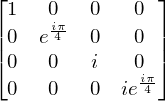

In [10]:
represent(T(0)*S(1),nqubits = 2)

この行列はすでに対角化されており、固有値の位相$\lambda$は$0, \pi/4, \pi/2, 3\pi/4$で、その二進小数表示は$(2\pi)0.0, (2\pi)0.001, (2\pi)0.01, (2\pi)0.011$である。よってこれらを誤差なく測定するためには３つの補助量子ビットが必要である。   
` CGateS ` 関数を用いて、$U$を制御化した `cP_2,3,4` を定義しよう。（2,3,4が３つの補助量子ビットに対応している。0,1は$U$の作用する空間である。先ほどの位相推定の回路図でいうと、下から順番に0,1,2,...とビットを名付けている。）

In [11]:
cP_2 = CGateS(2,T(0))*CGateS(2,S(1))
cP_3 = CGateS(3,T(0))*CGateS(3,S(1))
cP_4 = CGateS(4,T(0))*CGateS(4,S(1))

３つの補助量子ビットを用いて、位相推定アルゴリズムを構成していこう。   
まずはアダマールゲートを全ての補助量子ビットにかける。

In [12]:
PhaEst = H(4)*H(3)*H(2)
PhaEst

次に、制御ユニタリーをそれぞれ、1回、２回、４回と作用させていく。

In [13]:
PhaEst = cP_2*cP_3*cP_3*cP_4*cP_4*cP_4*cP_4*PhaEst

これで位相推定アルゴリズムの前半部分は終了である。ここから逆量子フーリエ変換を構築する。   
まず小数第3位については、補助量子ビット4に$H$演算を作用させればよい。

In [14]:
PhaEst = H(4)*PhaEst

補助量子ビット3には、まず補助量子ビット4を制御とする制御$R_2^\dagger=S^{-1}=SZ$演算を作用させる。

In [15]:
PhaEst = CGateS(4,S(3))*PhaEst
PhaEst = CGateS(4,Z(3))*PhaEst

その後に$H$演算を作用させる。

In [16]:
PhaEst = H(3)*PhaEst

補助量子ビット2には、

- 補助量子ビット3を制御とする制御$R_2^\dagger = S^{-1} = SZ$演算
- 補助量子ビット4を制御とする制御$R_3^\dagger = TS^{-1} = TSZ$演算
- $H$演算

の3つを作用させる。

In [17]:
PhaEst = CGateS(3,S(2))*PhaEst
PhaEst = CGateS(3,Z(2))*PhaEst

In [18]:
PhaEst = CGateS(4,T(2))*PhaEst
PhaEst = CGateS(4,S(2))*PhaEst
PhaEst = CGateS(4,Z(2))*PhaEst
PhaEst = H(2)*PhaEst

このように構成した位相推定アルゴリズムを固有ベクトルに作用させてみよう。アルゴリズム自体は非常に複雑だ。

In [19]:
PhaEst

しかし実際、入力に作用させると、

In [20]:
simplify(qapply(PhaEst*Qubit("00011")))

のように設計通り単純な解が得られることが確認できる。
実際、入力$|\psi\rangle$は$|11\rangle$なので対応する固有値は$e^{i5\pi/4}$だが、補助量子ビット2,3,4は011となっており、固有値の位相$\lambda=5\pi/4$の二進小数0.011が得られている！他の入力に対しても、

In [21]:
simplify(qapply(PhaEst*Qubit("00000")))

In [22]:
simplify(qapply(PhaEst*Qubit("00010")))

In [23]:
simplify(qapply(PhaEst*Qubit("00001")))

のように、４種類の固有値の位相情報が３つの補助量子ビットに得られていることが確かめられる。   
また、入力状態が重ね合わせ状態の場合は、

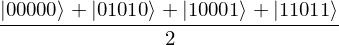

In [24]:
simplify(qapply(PhaEst*H(0)*H(1)*Qubit("00000")))

のように、それぞれの固有ベクトルに対して、固有値の位相が３つの補助量子ビットへと重ね合わせのまま取り出されている。この状態の補助量子ビットを測定すると、確率的にどれか一つの固有ベクトルと固有値が得られる。

---
### コラム：素因数分解と位相推定（やや難）

位相推定の重要な応用例として、素因数分解アルゴリズムを紹介する。
素因数分解問題は$n$桁の整数$N$が与えられた時に$N$の1ではない約数を
見つける問題であり、従来のコンピュータでは多項式時間で解けるアルゴリズムは
見つかっていない。現在のベストアルゴリズムの計算コストは、
\begin{eqnarray}
O(\exp \left[\frac{64}{9} n (\log n )^2 \right]^{1/3})
\end{eqnarray}
であり、準指数的な計算時間がかかる。
このような素因数分解問題の難しさを利用したRSA暗号などが日常的にも使われている。

P. Shorは1994年に、
量子コンピュータを用いることによって素因数分解問題が桁数$n$に対して多項式時間で解くことができる
ことを示した。これがいわゆるShorの素因数分解アルゴリズムである。

$N$を素因数分解したい整数だとしよう。まず、$N$と互いに素な整数$x$を見つけてくる。
（$x$はユークリッドの互除法で簡単に見つけられる。
適当に$x$を取ってきて、ユークリッドの互除法で$N$と$x$の最大公約数を計算し、
それが1以外の整数であれば$N$の非自明な約数がみつかったことになり(素)因数分解が完了するし、
1しかなければ$x$は$N$と互いに素な整数であることになる。）
このとき、$x$の$N$に関する位数$r$を考えてみる。
位数$r$とは、
\begin{eqnarray}
x^r \equiv 1 \textrm{ (mod $N$)}
\end{eqnarray}
を満たす最小の整数であり、ランダムに$x$を選ぶと高い確率で$r$は偶数になることが知られている。
$r$が偶数であると、上式は
\begin{eqnarray}
(x^{r/2} + 1) (x^{r/2} - 1)  \equiv 0  \textrm{ (mod $N$)}
\end{eqnarray}
のように変形することができる。
これはつまり、$x^{r/2} \pm 1 \equiv 0 \: (\textrm{mod} \: N) $であるか、
$x^{r/2} + 1$と$x^{r/2} - 1$が$N$と非自明な公約数(**$N$の因数**)をもつかのどちらかであることを意味する。
実は、$x$がランダムに選ばれているとき、後者の確率が十分高いことも示すことができる。よって、$x^{r/2} + 1$か$x^{r/2} - 1$と$N$との公約数をユークリッドの互除法で用いることにより、最終的に非自明な$N$の因数が見つかることになる。
これを繰り返していくことによって、$N$をどんどん小さな因数へと分解していくことができ、最終的に素因数分解が達成できる。

　そして、素因数分解の鍵となる位数$r$は、実は入力$y$をmod Nのもとでx倍するという古典計算に対応したユニタリ行列
$$
U_x = \sum _y |yx \: {\rm (mod N)}\rangle \langle y|
$$
の固有値を求めることによって決定することができる。実際、固有状態のラベル$0 \leq s \leq r-1$を用いて，固有ベクトルは 
$$
|u_s\rangle = \frac{1}{\sqrt{r}}
\sum _{k=0}^{r-1} e^ {-2 \pi i (s/r) k }|x^k (\textrm{mod} cu)\rangle.
$$
と書き下すことができ、
$$
U_x |u_s \rangle =  e^{2 \pi i (s/r)} |u_s \rangle
$$
を満たす。つまり固有値の位相推定から$s/r$を求めその分母として$r$を得ることができる（そして、その位数$r$から上記の手順で$N$の素因数分解ができる）。
これがいわゆる、ショアによる素因数分解アルゴリズム（キタエフの位相推定を利用したバージョン）である。

(詳細は Nielsen-Chuang の `5.3 Applicaitons: order-finding and factoring` を参照)

---
### 第２章のまとめ
第2章では、以下のことを学んだ。
- 量子アルゴリズムとは何か
- NISQアルゴリズム
- アダマールテスト
- 量子フーリエ変換
- 位相推定アルゴリズム

この章で学んだアルゴリズム、特に位相推定アルゴリズムは量子コンピュータを使いこなす上で非常に大切なもので、様々な応用がある。
1. 素因数分解問題：上記コラムで見たように、位相推定アルゴリズムを用いて位数という数を推定することによって素因数分解を行うことができる。
2. 量子系のエネルギー計算：量子力学において、エネルギーはハミルトニアンと呼ばれる行列の固有値によって与えられる。もっとも安定的な状態のエネルギーはもっとも小さい値の固有値、安定な状態は対応する固有ベクトルで与えられる。ハミルトニアン自体はユニタリー行列ではないものの、行列の指数関数で定義される時間発展に対応するユニタリ行列$e^{-i H t}$に対して位相推定を行うことによって、エネルギーを計算することができる。
3. 連立一次方程式$Ax=b$の求解：位相推定を使って求めた固有値・固有ベクトルを用いることにより、連立一次方程式の解([7-3節])を求めることができる。また、その機械学習への応用も研究されている。